In [1]:
from get_photon_fraction import get_photon_fraction
machine = 'laptop'
if machine == 'laptop':
    mc_results_path = '/Volumes/Backup/Cosmo/distance_distribution/dense_z_source_2000_nu_bins/'
    output_path = '/Volumes/Backup/Cosmo/IC_and_backgrouds_py/lya_scattering/'
elif machine == 'power':
    mc_results_path = '/scratch300/itamarreis/git/distance_distribution_lya/dense_z_source_2000_nu_bins_5000_r/'
    output_path = '/scratch300/itamarreis/git/poisson_21cm/IC_and_backgrounds/lya_scattering/'

In [2]:
get_photon_fraction(mc_results_path, output_path)

In [3]:
from scipy.io import loadmat
import matplotlib.colors as mcolors
from astropy.cosmology import Planck15 as cosmo
from astropy import units as u
import matplotlib.pyplot as plt
from matplotlib_params import set_plt_params
plt = set_plt_params(plt)
import numpy

In [4]:
R = loadmat('{}lya_scattering_r_grid.mat'.format(output_path))['R_lya_scatter'][0]
rmin, rmax = R.min(), R.max()
Z = loadmat('{}lya_scattering_z_grid.mat'.format(output_path))['z_lya_scatter'][0]
zmin, zmax = Z.min(), Z.max()

In [74]:
za = 24 # z absorption
ze = 27 # z emission

In [29]:
photon_fractions = loadmat('{}lya_scattering_{}.mat'.format(output_path,za))['photon_fractions']

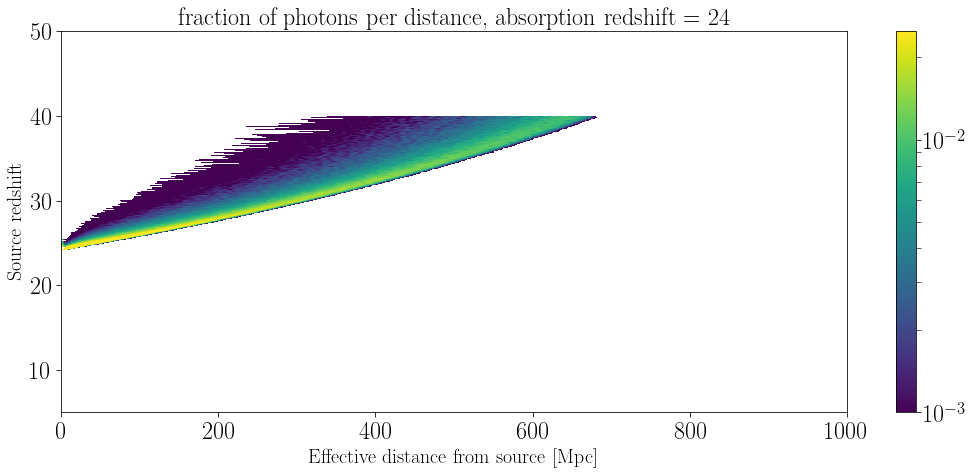

In [45]:
plt.figure(figsize = (15,7))
plt.title('fraction of photons per distance, absorption redshift = {}'.format(za))
plt.imshow(photon_fractions[::-1, ::1], extent=[rmin,rmax,zmin,zmax],  aspect="auto", norm=mcolors.LogNorm(vmax = 0.025, vmin = 1e-3))
plt.colorbar()
plt.xlabel('Effective distance from source [Mpc]', fontsize = 20)
plt.ylabel('Source redshift', fontsize = 20)
plt.tight_layout()
plt.savefig('fop.png')
plt.show()

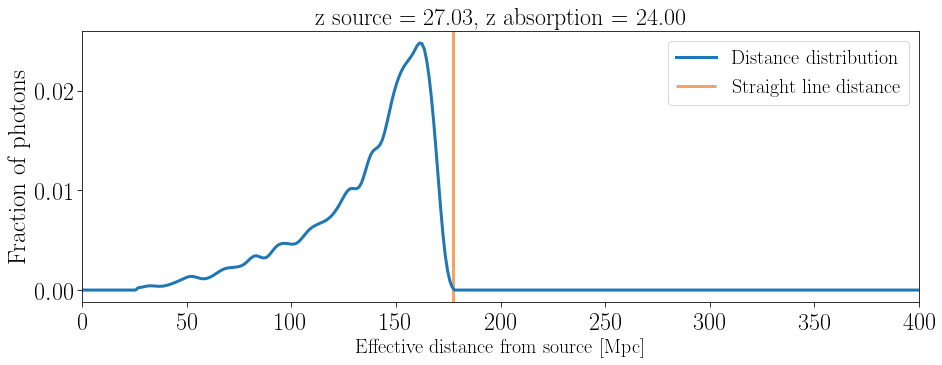

(177.44131903891238, 2.2490547572157693)

In [76]:
plt.figure()
idx = numpy.argmax(Z > ze)
plt.title('z source = {:.2f}, z absorption = {:.2f}'.format(Z[idx],za ))
R_sl = 6 / (cosmo.h * (cosmo.Om0)**(0.5)) * (1/numpy.sqrt(1 + za) - 1/numpy.sqrt(1 + Z[idx])) * 1000
x,y = R,photon_fractions[idx]
plt.plot(x,y, lw = 3, label = 'Distance distribution')
ylim = plt.gca().get_ylim()
plt.vlines(R_sl, ymin=ylim[0], ymax=ylim[1], color='sandybrown', lw = 3, label = 'Straight line distance')
plt.ylim(ylim)
plt.xlim([0,400])
plt.legend(fontsize = 20)
plt.xlabel('Effective distance from source [Mpc]', fontsize = 20)
plt.ylabel('Fraction of photons', fontsize = 25)
plt.savefig('zaze_example.png')
plt.show()
R_sl, numpy.log10(R_sl)